# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [31]:
import numpy as np
import matplotlib.pylab as plt
from sympy import sec
import scipy.optimize as sc

\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}

\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}


In [94]:
def alcance_max(v0,theta,b,t): #funcion dependiente de v0,theta,coeficiente de friccion(b) y tiempo(t)
  theta = (np.pi/180)*theta
  v0_x = v0*np.cos(theta)
  v0_y = v0*np.sin(theta)
  g = 9.8

  x = (v0_x/b)*(1 - np.exp(-b*t))
  y_max = ((g/b)+ v0_y)*(x/v0_x) + (g/b**2)*np.log(1 - ((x*b)/v0_x))


  return print('El alcance máximo es: ' ,y_max, 'metros')



In [95]:
alcance_max(55,45,0.005,5)

El alcance máximo es:  70.55829985503442 metros


Text(0, 0.5, 'Posicion en x [Metros]')

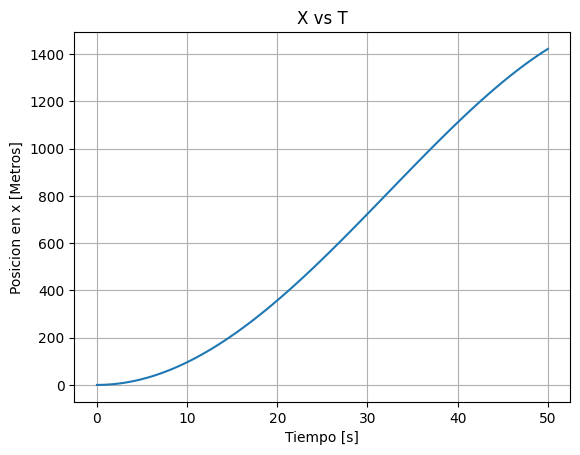

In [54]:
t = np.linspace(0,50,100)
v0 = np.linspace(0,50,100)
thetha = np.linspace(0,50,100)
angulo = (np.deg2rad(thetha))
v0_x = v0*np.cos(angulo)
b = 0.005
x = (v0_x/b)*(1 - np.exp(-b*t))

plt.figure()
plt.plot(t,x)
plt.grid()
plt.title('X vs T')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posicion en x [Metros]')

Text(0, 0.5, 'Posicion en y [Metros]')

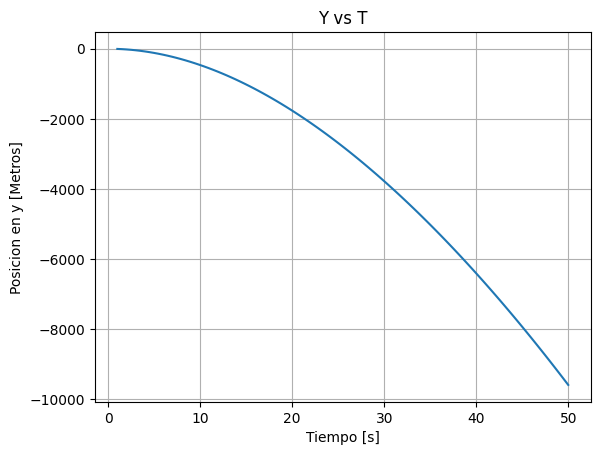

In [62]:
t = np.linspace(1,50,100)
v0 = np.linspace(1,50,100)
thetha = np.linspace(1,50,100)
angulo = (np.deg2rad(thetha))
v0_y = v0*np.sin(angulo)
g = 9.8
b = 0.005
y = (1/b)*((g/b)+ v0_y)*(1 - np.exp(-b*t)) - (g/b)*t

plt.figure()
plt.plot(t,y)
plt.grid()
plt.title('Y vs T')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posicion en y [Metros]')

Text(0, 0.5, 'y [metros]')

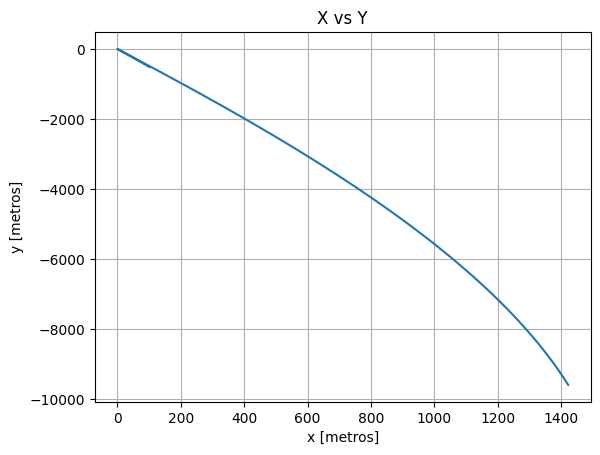

In [67]:
t = np.linspace(-10,50,100)
v0 = np.linspace(-10,50,100)
thetha = np.linspace(-10,50,100)
angulo = (np.deg2rad(thetha))
v0_x = v0*np.cos(angulo)
v0_y = v0*np.sin(angulo)

x = (v0_x/b)*(1 - np.exp(-b*t))
y = (1/b)*((g/b)+ v0_y)*(1 - np.exp(-b*t)) - (g/b)*t

plt.figure()
plt.plot(x,y)
plt.grid()
plt.title('X vs Y')
plt.xlabel('x [metros]')
plt.ylabel( 'y [metros]')